# Creating and Backtesting MACD Strategies

# Getting the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [4]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [5]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [6]:
data.info

<bound method DataFrame.info of                price
Date                
2004-01-01  1.258194
2004-01-02  1.258194
2004-01-05  1.268698
2004-01-06  1.272103
2004-01-07  1.264095
...              ...
2020-06-24  1.131235
2020-06-25  1.125087
2020-06-26  1.122208
2020-06-29  1.122586
2020-06-30  1.124720

[4275 rows x 1 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

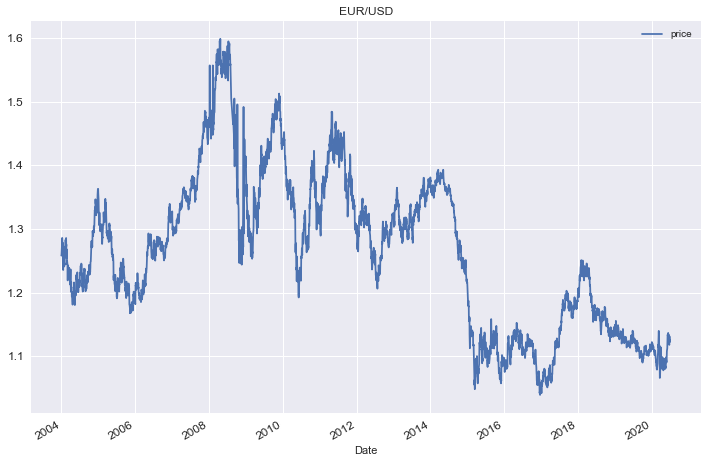

In [7]:
data.plot(figsize = (12,8), title = "EUR/USD", fontsize = 12)
plt.show

In [8]:
# Defining an MACD Strategy (Part 1)

In [9]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [10]:
ema_s = 12 # EMA Short
ema_l = 26 # EMA long

In [12]:
data["EMA_S"] = data.price.ewm(span = ema_s, min_periods = ema_s).mean()

In [13]:
data["EMA_L"] = data.price.ewm(span = ema_l, min_periods = ema_l).mean() 

In [14]:
data

,price,EMA_S,EMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.125123,1.117852
2020-06-25,1.125087,1.125118,1.118388
2020-06-26,1.122208,1.124670,1.118671


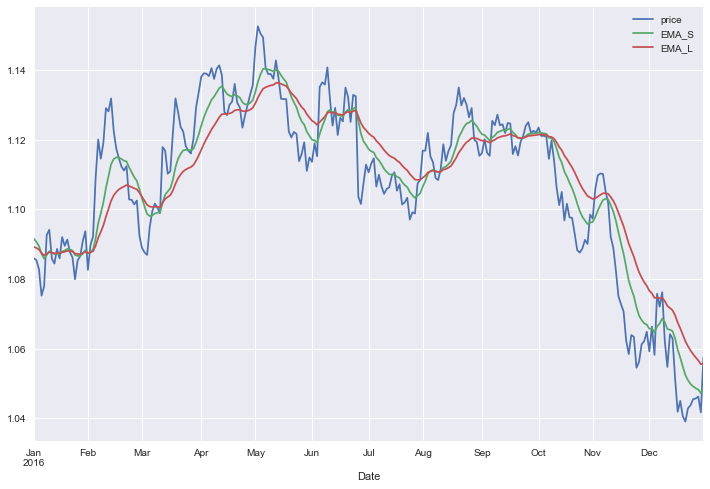

In [15]:
data.loc["2016", ["price", "EMA_S", "EMA_L"]].plot(figsize = (12, 8))
plt.show()

In [16]:
data["MACD"] = data.EMA_S - data.EMA_L

In [17]:
data

,price,EMA_S,EMA_L,MACD
Date,,,,
2004-01-01,1.258194,NaN,NaN,NaN
2004-01-02,1.258194,NaN,NaN,NaN
2004-01-05,1.268698,NaN,NaN,NaN
2004-01-06,1.272103,NaN,NaN,NaN
2004-01-07,1.264095,NaN,NaN,NaN
...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272
2020-06-25,1.125087,1.125118,1.118388,0.006730
2020-06-26,1.122208,1.124670,1.118671,0.005999


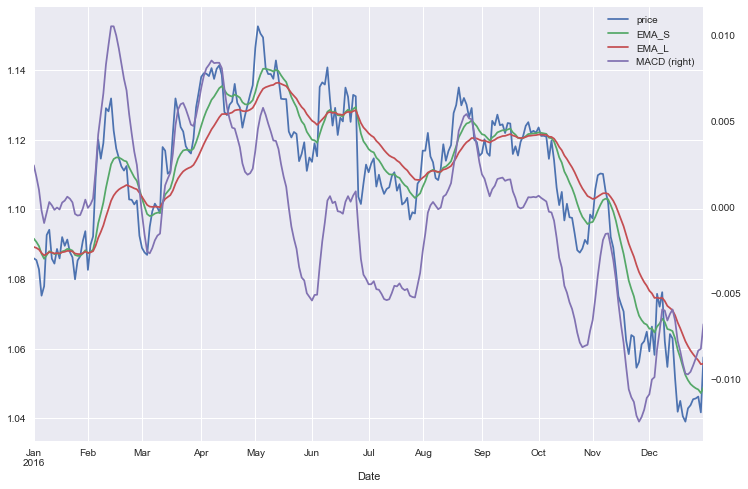

In [19]:
data.loc["2016", ["price", "EMA_S", "EMA_L", "MACD"]].plot(figsize = (12, 8), secondary_y = "MACD")
plt.show()

In [20]:
signal_mw = 9 # Moving Window for Signal Line

In [22]:
data["MACD_Signal"] = data.MACD.ewm(span = signal_mw, min_periods = signal_mw).mean()

In [23]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal
Date,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,NaN
2004-01-02,1.258194,NaN,NaN,NaN,NaN
2004-01-05,1.268698,NaN,NaN,NaN,NaN
2004-01-06,1.272103,NaN,NaN,NaN,NaN
2004-01-07,1.264095,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727


In [24]:
data.loc["2016"]

,price,EMA_S,EMA_L,MACD,MACD_Signal
Date,,,,,
2016-01-01,1.085906,1.091559,1.089167,0.002392,0.002641
2016-01-04,1.085399,1.090611,1.088888,0.001723,0.002458
2016-01-05,1.082755,1.089402,1.088433,0.000969,0.002160
2016-01-06,1.075199,1.087217,1.087453,-0.000236,0.001681
2016-01-07,1.077900,1.085784,1.086745,-0.000962,0.001152
...,...,...,...,...,...
2016-12-26,1.045478,1.049165,1.058405,-0.009240,-0.008833
2016-12-27,1.045697,1.048631,1.057464,-0.008832,-0.008833
2016-12-28,1.046233,1.048262,1.056632,-0.008370,-0.008740


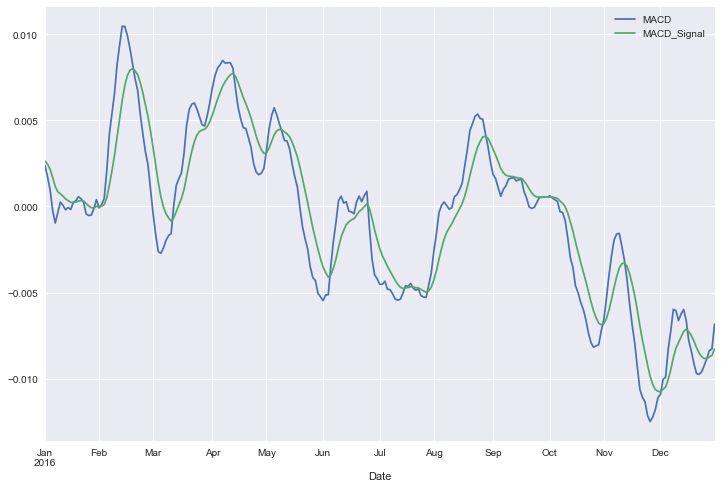

In [25]:
data.loc["2016", ["MACD", "MACD_Signal"]].plot(figsize = (12, 8))
plt.show()

In [26]:
##Defining an MACD Strategy (Part 2)

In [27]:
data["position"] = np.where(data.MACD - data.MACD_Signal > 0, 1, -1)

In [28]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1


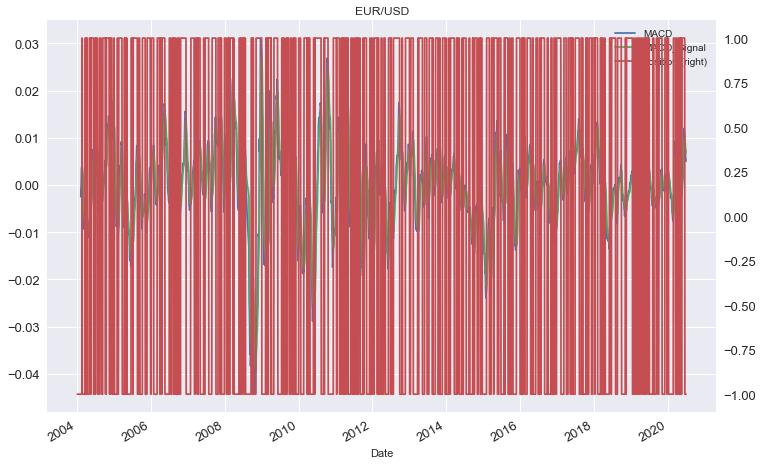

In [29]:
data.loc[:,["MACD", "MACD_Signal", "position"]].plot(figsize = (12,8), fontsize = 13,
                                                    secondary_y = "position", title = "EUR/USD")
plt.show()

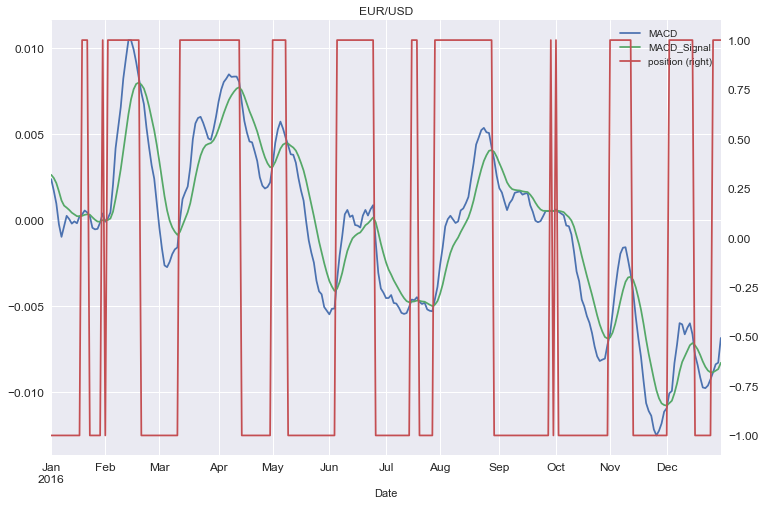

In [30]:
data.loc["2016", ["MACD", "MACD_Signal", "position"]].plot(figsize = (12, 8), fontsize = 12,
                                                           secondary_y = "position", title = "EUR/USD")
plt.show()

In [31]:
##Vectorized Strategy Backtesting

In [32]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1


In [33]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [34]:
data.dropna(inplace = True)

In [35]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns
Date,,,,,,,
2004-02-17,1.285793,1.271256,1.266191,0.005065,0.003018,1,0.007251
2004-02-18,1.272508,1.271449,1.266693,0.004756,0.003408,1,-0.010386
2004-02-19,1.275705,1.272106,1.267405,0.004700,0.003691,1,0.002510
2004-02-20,1.254202,1.269345,1.266367,0.002978,0.003538,-1,-0.017000
2004-02-23,1.257197,1.267473,1.265649,0.001824,0.003175,-1,0.002386
...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1,0.002892
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1,-0.005449
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1,-0.002562


In [36]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [37]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns,strategy
Date,,,,,,,,
2004-02-17,1.285793,1.271256,1.266191,0.005065,0.003018,1,0.007251,NaN
2004-02-18,1.272508,1.271449,1.266693,0.004756,0.003408,1,-0.010386,-0.010386
2004-02-19,1.275705,1.272106,1.267405,0.004700,0.003691,1,0.002510,0.002510
2004-02-20,1.254202,1.269345,1.266367,0.002978,0.003538,-1,-0.017000,-0.017000
2004-02-23,1.257197,1.267473,1.265649,0.001824,0.003175,-1,0.002386,-0.002386
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1,0.002892,-0.002892
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1,-0.005449,0.005449
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1,-0.002562,0.002562


In [38]:
data.dropna(inplace = True)

In [39]:
ptc = 0.00007

In [40]:
data["trades"] = data.position.diff().fillna(0).abs()

In [41]:
data.trades.value_counts()

0.0    3864
2.0     377
Name: trades, dtype: int64

In [42]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [43]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)

In [44]:
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [45]:
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [46]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,
2004-02-18,1.272508,1.271449,1.266693,0.004756,0.003408,1,-0.010386,-0.010386,0.0,-0.010386,0.989667,0.989667,0.989667
2004-02-19,1.275705,1.272106,1.267405,0.004700,0.003691,1,0.002510,0.002510,0.0,0.002510,0.992154,0.992154,0.992154
2004-02-20,1.254202,1.269345,1.266367,0.002978,0.003538,-1,-0.017000,-0.017000,2.0,-0.017140,0.975430,0.975430,0.975294
2004-02-23,1.257197,1.267473,1.265649,0.001824,0.003175,-1,0.002386,-0.002386,0.0,-0.002386,0.977760,0.973106,0.972969
2004-02-24,1.267797,1.267523,1.265817,0.001706,0.002868,-1,0.008395,-0.008395,0.0,-0.008395,0.986003,0.964970,0.964835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1,0.002892,-0.002892,0.0,-0.002892,0.879795,0.436655,0.414206
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1,-0.005449,0.005449,0.0,0.005449,0.875014,0.439041,0.416470
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1,-0.002562,0.002562,0.0,0.002562,0.872775,0.440168,0.417538


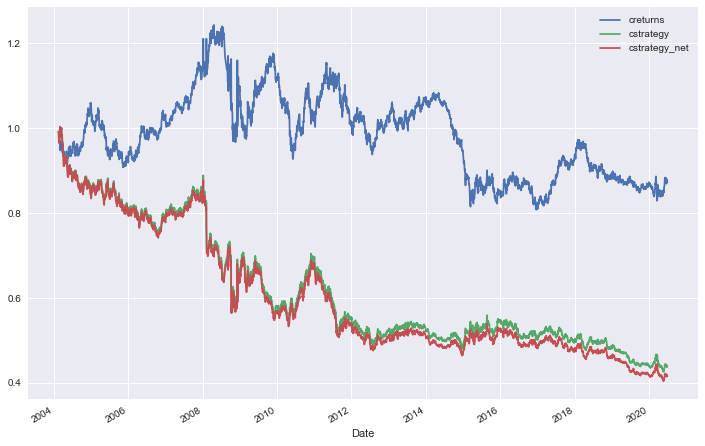

In [47]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12, 8))
plt.show()

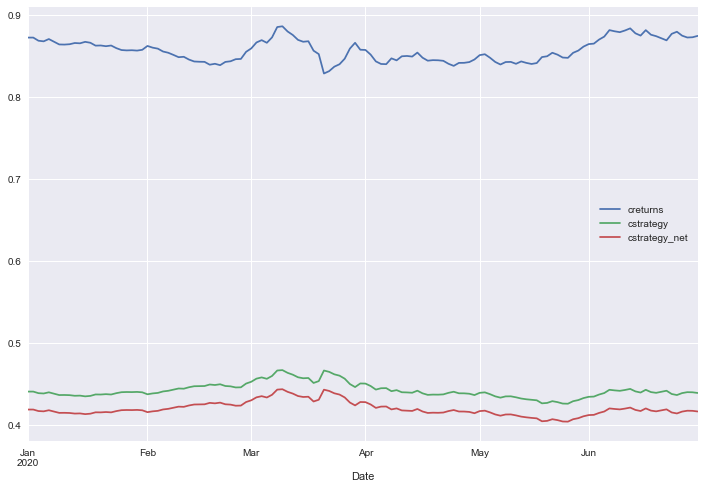

In [48]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [49]:
##Using the MACDBacktester Class

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [51]:
pd.read_csv("forex_pairs.csv")

,Date,AUDEUR=X,EURUSD=X,USDGBP=X
0,2004-01-01,0.59780,1.258194,0.56016
1,2004-01-02,0.60314,1.258194,0.55751
2,2004-01-05,0.60467,1.268698,0.55334
3,2004-01-06,0.60350,1.272103,0.54906
4,2004-01-07,0.60728,1.264095,0.55012
...,...,...,...,...
4290,2020-06-24,0.61349,1.131235,0.79841
4291,2020-06-25,0.60938,1.125087,0.80561
4292,2020-06-26,0.61373,1.122208,0.80480
4293,2020-06-29,0.61128,1.122586,0.81023


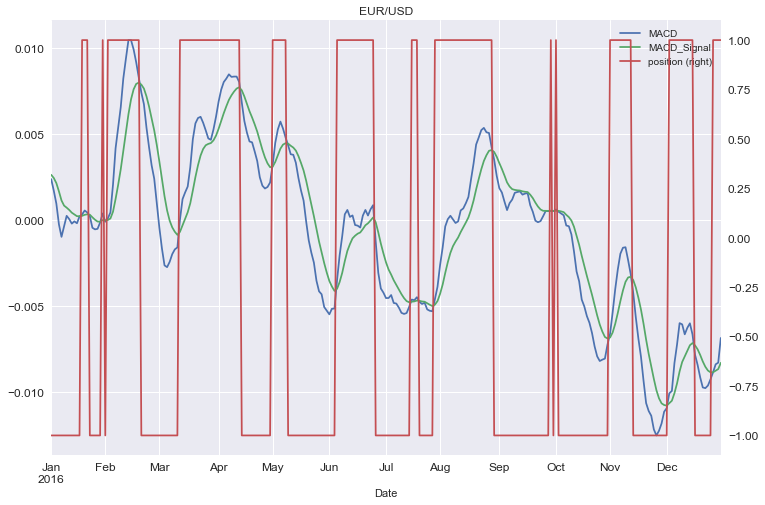

In [59]:
data.loc["2016", ["MACD", "MACD_Signal", "position"]].plot(figsize = (12, 8), fontsize = 12,
                                                           secondary_y = "position", title = "EUR/USD")
plt.show()

In [60]:
ptc = 0.00007

In [66]:
data["position"] = np.where(data.MACD - data.MACD_Signal > 0, 1, -1)

In [67]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,
2004-02-18,1.272508,1.271449,1.266693,0.004756,0.003408,1,-0.010386,-0.010386,0.0,-0.010386,0.989667,0.989667,0.989667
2004-02-19,1.275705,1.272106,1.267405,0.004700,0.003691,1,0.002510,0.002510,0.0,0.002510,0.992154,0.992154,0.992154
2004-02-20,1.254202,1.269345,1.266367,0.002978,0.003538,-1,-0.017000,-0.017000,2.0,-0.017140,0.975430,0.975430,0.975294
2004-02-23,1.257197,1.267473,1.265649,0.001824,0.003175,-1,0.002386,-0.002386,0.0,-0.002386,0.977760,0.973106,0.972969
2004-02-24,1.267797,1.267523,1.265817,0.001706,0.002868,-1,0.008395,-0.008395,0.0,-0.008395,0.986003,0.964970,0.964835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1,0.002892,-0.002892,0.0,-0.002892,0.879795,0.436655,0.414206
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1,-0.005449,0.005449,0.0,0.005449,0.875014,0.439041,0.416470
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1,-0.002562,0.002562,0.0,0.002562,0.872775,0.440168,0.417538


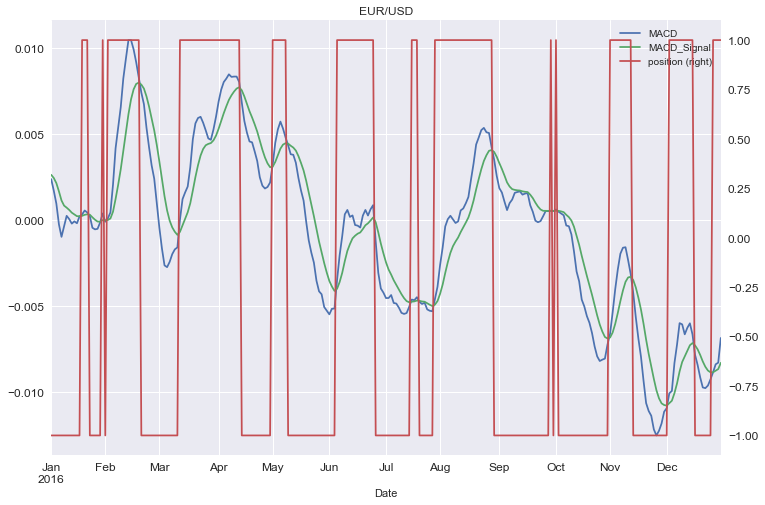

In [68]:
data.loc["2016", ["MACD", "MACD_Signal", "position"]].plot(figsize = (12, 8), fontsize = 12,
                                                           secondary_y = "position", title = "EUR/USD")
plt.show()

In [70]:
import MACDBacktester as MACD

ModuleNotFoundError: No module named 'MACDBacktester'

In [71]:
pd.read_csv("forex_pairs.csv")

,Date,AUDEUR=X,EURUSD=X,USDGBP=X
0,2004-01-01,0.59780,1.258194,0.56016
1,2004-01-02,0.60314,1.258194,0.55751
2,2004-01-05,0.60467,1.268698,0.55334
3,2004-01-06,0.60350,1.272103,0.54906
4,2004-01-07,0.60728,1.264095,0.55012
...,...,...,...,...
4290,2020-06-24,0.61349,1.131235,0.79841
4291,2020-06-25,0.60938,1.125087,0.80561
4292,2020-06-26,0.61373,1.122208,0.80480
4293,2020-06-29,0.61128,1.122586,0.81023


In [73]:
pip install backtesting

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 175.5/175.5 kB 440.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 7.0/7.0 MB 4.9 MB/s eta 0:00:00
   --------------------------------------- 182.8/182.8 kB 10.8 MB/s eta 0:00:00
   ---------------------------------------- 438.5/438.5 kB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 83.9/83.9 kB 4.6 MB/s eta 0:00:00
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173969 sha256=94083084bfbe6b64aedb93daf5a1798b8b1404a639b9f745785bdffb7fabee77
  Stored in directory: c:\users\930140\appdata\local\pip\cache\wheels\3f\7c\24\f8816cdb5359accfe50ebbb023baf41e98592f11528ed26ce6
Successfully built backtesting
  Attempting uninstall: tornado
    Found existing installation: tornado 6.1
    Uninstalling tornado-6.

  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [76]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,
2004-02-18,1.272508,1.271449,1.266693,0.004756,0.003408,1,-0.010386,-0.010386,0.0,-0.010386,0.989667,0.989667,0.989667
2004-02-19,1.275705,1.272106,1.267405,0.004700,0.003691,1,0.002510,0.002510,0.0,0.002510,0.992154,0.992154,0.992154
2004-02-20,1.254202,1.269345,1.266367,0.002978,0.003538,-1,-0.017000,-0.017000,2.0,-0.017140,0.975430,0.975430,0.975294
2004-02-23,1.257197,1.267473,1.265649,0.001824,0.003175,-1,0.002386,-0.002386,0.0,-0.002386,0.977760,0.973106,0.972969
2004-02-24,1.267797,1.267523,1.265817,0.001706,0.002868,-1,0.008395,-0.008395,0.0,-0.008395,0.986003,0.964970,0.964835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1,0.002892,-0.002892,0.0,-0.002892,0.879795,0.436655,0.414206
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1,-0.005449,0.005449,0.0,0.005449,0.875014,0.439041,0.416470
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1,-0.002562,0.002562,0.0,0.002562,0.872775,0.440168,0.417538


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4241 entries, 2004-02-18 to 2020-06-30
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4241 non-null   float64
 1   EMA_S          4241 non-null   float64
 2   EMA_L          4241 non-null   float64
 3   MACD           4241 non-null   float64
 4   MACD_Signal    4241 non-null   float64
 5   position       4241 non-null   int32  
 6   returns        4241 non-null   float64
 7   strategy       4241 non-null   float64
 8   trades         4241 non-null   float64
 9   strategy_net   4241 non-null   float64
 10  creturns       4241 non-null   float64
 11  cstrategy      4241 non-null   float64
 12  cstrategy_net  4241 non-null   float64
dtypes: float64(12), int32(1)
memory usage: 447.3 KB


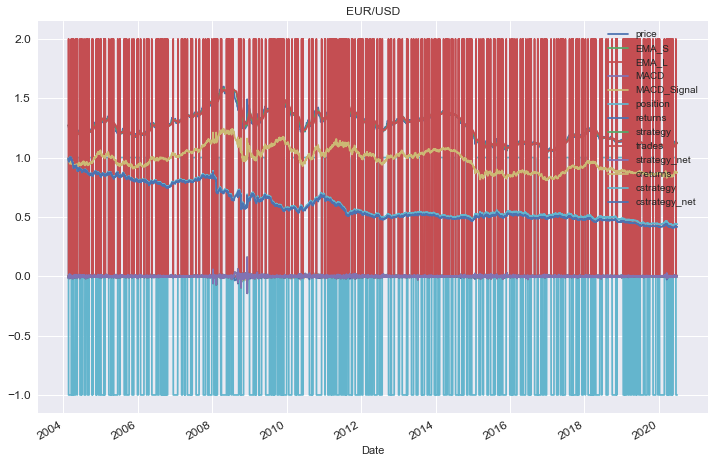

In [78]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [79]:
data["MACD"] = data.EMA_S - data.EMA_L

In [80]:
data["position"] = np.where(data.MACD - data.MACD_Signal > 0, 1, -1)

In [81]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,
2004-02-18,1.272508,1.271449,1.266693,0.004756,0.003408,1,-0.010386,-0.010386,0.0,-0.010386,0.989667,0.989667,0.989667
2004-02-19,1.275705,1.272106,1.267405,0.004700,0.003691,1,0.002510,0.002510,0.0,0.002510,0.992154,0.992154,0.992154
2004-02-20,1.254202,1.269345,1.266367,0.002978,0.003538,-1,-0.017000,-0.017000,2.0,-0.017140,0.975430,0.975430,0.975294
2004-02-23,1.257197,1.267473,1.265649,0.001824,0.003175,-1,0.002386,-0.002386,0.0,-0.002386,0.977760,0.973106,0.972969
2004-02-24,1.267797,1.267523,1.265817,0.001706,0.002868,-1,0.008395,-0.008395,0.0,-0.008395,0.986003,0.964970,0.964835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1,0.002892,-0.002892,0.0,-0.002892,0.879795,0.436655,0.414206
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1,-0.005449,0.005449,0.0,0.005449,0.875014,0.439041,0.416470
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1,-0.002562,0.002562,0.0,0.002562,0.872775,0.440168,0.417538


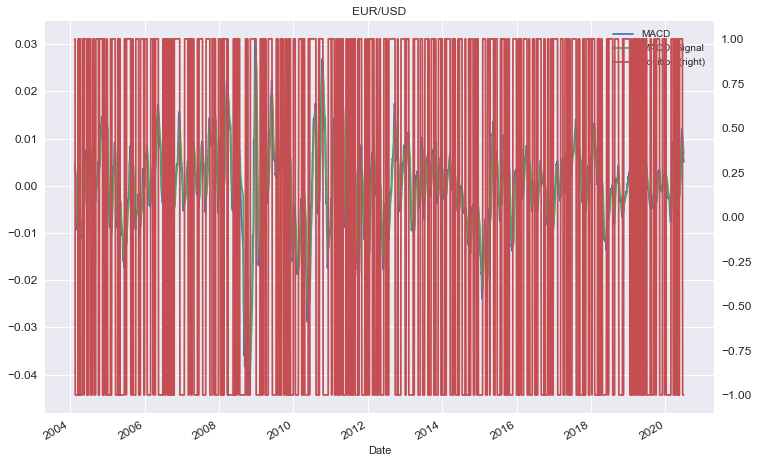

In [82]:
data.loc[:, ["MACD", "MACD_Signal", "position"]].plot(figsize = (12, 8), fontsize = 12, 
                                                      secondary_y = "position", title = "EUR/USD")
plt.show()

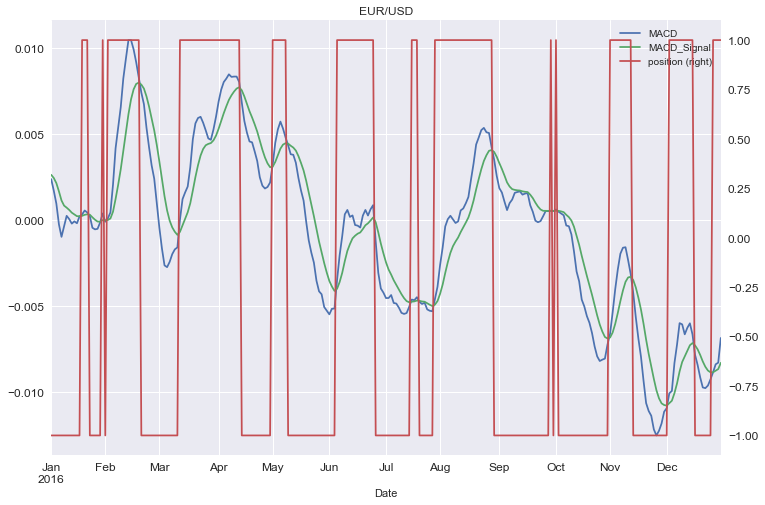

In [83]:
data.loc["2016", ["MACD", "MACD_Signal", "position"]].plot(figsize = (12, 8), fontsize = 12,
                                                           secondary_y = "position", title = "EUR/USD")
plt.show()

In [87]:
data["MACD"] = data.EMA_S - data.EMA_L

In [88]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,
2004-02-18,1.272508,1.271449,1.266693,0.004756,0.003408,1,-0.010386,-0.010386,0.0,-0.010386,0.989667,0.989667,0.989667
2004-02-19,1.275705,1.272106,1.267405,0.004700,0.003691,1,0.002510,0.002510,0.0,0.002510,0.992154,0.992154,0.992154
2004-02-20,1.254202,1.269345,1.266367,0.002978,0.003538,-1,-0.017000,-0.017000,2.0,-0.017140,0.975430,0.975430,0.975294
2004-02-23,1.257197,1.267473,1.265649,0.001824,0.003175,-1,0.002386,-0.002386,0.0,-0.002386,0.977760,0.973106,0.972969
2004-02-24,1.267797,1.267523,1.265817,0.001706,0.002868,-1,0.008395,-0.008395,0.0,-0.008395,0.986003,0.964970,0.964835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1,0.002892,-0.002892,0.0,-0.002892,0.879795,0.436655,0.414206
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1,-0.005449,0.005449,0.0,0.005449,0.875014,0.439041,0.416470
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1,-0.002562,0.002562,0.0,0.002562,0.872775,0.440168,0.417538


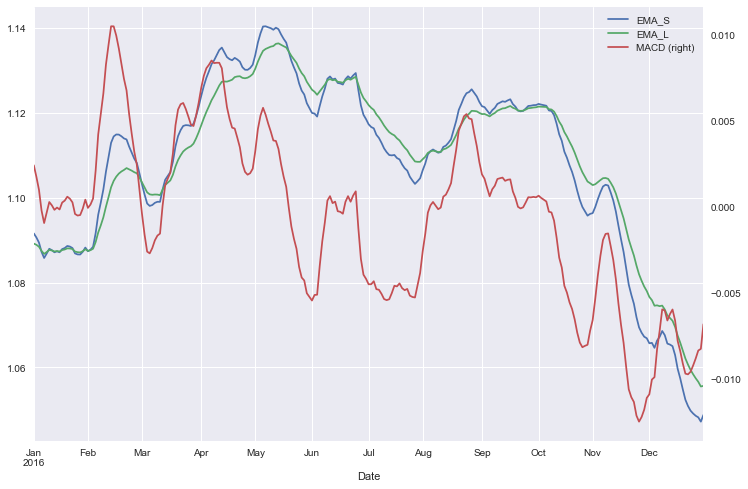

In [89]:
data.loc["2016", ["EMA_S", "EMA_L", "MACD"]].plot(figsize = (12, 8), secondary_y = "MACD")
plt.show()

In [91]:
if __name__ == "__main__":
    symbol = "EUR/USD"  # Example stock symbol
    start = "2016-01-01"  # Start date for backtesting
    end = "2021-01-01"  # End date for backtesting
    macd_short = 12  # Short-term EMA period
    macd_long = 26  # Long-term EMA period
    macd_signal = 9  # Signal line EMA period

In [93]:
## Using the MACDBacktesterClass

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [95]:
pd.read_csv("forex_pairs.csv")

,Date,AUDEUR=X,EURUSD=X,USDGBP=X
0,2004-01-01,0.59780,1.258194,0.56016
1,2004-01-02,0.60314,1.258194,0.55751
2,2004-01-05,0.60467,1.268698,0.55334
3,2004-01-06,0.60350,1.272103,0.54906
4,2004-01-07,0.60728,1.264095,0.55012
...,...,...,...,...
4290,2020-06-24,0.61349,1.131235,0.79841
4291,2020-06-25,0.60938,1.125087,0.80561
4292,2020-06-26,0.61373,1.122208,0.80480
4293,2020-06-29,0.61128,1.122586,0.81023


In [96]:
from MACDBacktester import MACDBacktester as MACD

In [97]:
ptc = 0.00007

In [98]:
tester = MACD("EURUSD=X", EMA_S = 12, EMA_L = 26, signal_mw = 9,
              start = "2004-01-01", end = "2020-06-30", tc = ptc)

In [99]:
tester

MACDBacktester(symbol = EURUSD=X, MACD(12, 26, 9), start = 2004-01-01, end = 2020-06-30)

In [100]:
tester.data

,price,returns,EMA_S,EMA_L,MACD,MACD_Signal
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,NaN,NaN,NaN,NaN
2004-01-05,1.268698,0.008313,NaN,NaN,NaN,NaN
2004-01-06,1.272103,0.002681,NaN,NaN,NaN,NaN
2004-01-07,1.264095,-0.006315,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.125123,1.117852,0.007272,0.008516
2020-06-25,1.125087,-0.005449,1.125118,1.118388,0.006730,0.008158
2020-06-26,1.122208,-0.002562,1.124670,1.118671,0.005999,0.007727


In [101]:
tester.test_strategy()

(0.416605, -0.458123)

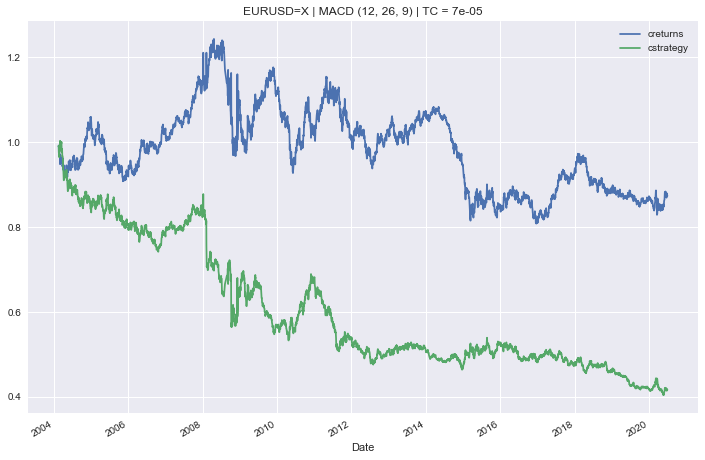

In [102]:
tester.plot_results()

In [103]:
tester.results

,price,returns,EMA_S,EMA_L,MACD,MACD_Signal,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,
2004-02-18,1.272508,-0.010386,1.271449,1.266693,0.004756,0.003408,1,-0.010386,0.0,0.989667,0.989667
2004-02-19,1.275705,0.002510,1.272106,1.267405,0.004700,0.003691,1,0.002510,0.0,0.992154,0.992154
2004-02-20,1.254202,-0.017000,1.269345,1.266367,0.002978,0.003538,-1,-0.017140,2.0,0.975430,0.975294
2004-02-23,1.257197,0.002386,1.267473,1.265649,0.001824,0.003175,-1,-0.002386,0.0,0.977760,0.972969
2004-02-24,1.267797,0.008395,1.267523,1.265817,0.001706,0.002868,-1,-0.008395,0.0,0.986003,0.964835
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.125123,1.117852,0.007272,0.008516,-1,-0.002892,0.0,0.879795,0.414206
2020-06-25,1.125087,-0.005449,1.125118,1.118388,0.006730,0.008158,-1,0.005449,0.0,0.875014,0.416470
2020-06-26,1.122208,-0.002562,1.124670,1.118671,0.005999,0.007727,-1,0.002562,0.0,0.872775,0.417538


In [104]:
tester.optimize_parameters((5, 20, 1), (21, 50, 1), (5, 20, 1))

(array([18., 30., 19.]), 0.760579)

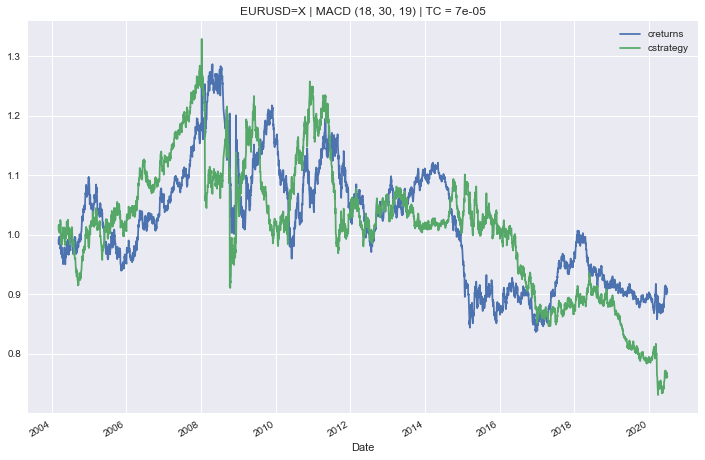

In [105]:
tester.plot_results()